In [2]:
import numpy as np
import os
#os.environ['CUDARRAY_BACKEND'] = 'numpy'
import deeppy as dp
import matplotlib
import matplotlib.pyplot as plt


# Fetch MNIST data
dataset = dp.dataset.MNIST()
x_train, y_train, x_test, y_test = dataset.data(dp_dtypes=True)

# Bring images to BCHW format
x_train = x_train[:, np.newaxis, :, :]
x_test = x_test[:, np.newaxis, :, :]

# Normalize pixel intensities
scaler = dp.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2]:
__imp

In [3]:
import sklearn.datasets
dataset = sklearn.datasets.fetch_covtype(data_home=None, download_if_missing=True, random_state=None, shuffle=False)

In [12]:
import sklearn.cross_validation
import numpy as np
import os
#os.environ['CUDARRAY_BACKEND'] = 'numpy'
import deeppy as dp
import matplotlib
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(dataset.data,dataset.target)
#x_train = datasettaset = 

In [10]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [14]:
n_classes = 7

In [16]:
from sgd import StochasticGradientDescent
from learn_rule_sag import SAG
from idx_input import SupervisedIdxInput

# Prepare network inputs
N_obj = 20000
batch_size = 1
train_input = SupervisedIdxInput(x_train[:N_obj], y_train[:N_obj], batch_size=batch_size)
test_input = dp.Input(x_test)

# Setup network
def pool_layer():
    return dp.Pool(
        win_shape=(2, 2),
        strides=(2, 2),
        border_mode='valid',
        method='max',
    )

def conv_layer(n_filters):
    return dp.Convolution(
        n_filters=n_filters,
        filter_shape=(5, 5),
        border_mode='valid',
        weights=dp.Parameter(dp.AutoFiller(gain=1.39),
                             weight_decay=0.0005),
    )

weight_gain_fc = 1.84
weight_decay_fc = 0.0
net = dp.NeuralNetwork(
    layers=[
        dp.Flatten(),
        dp.FullyConnected(
            n_out=n_classes,
            weights=dp.Parameter(dp.AutoFiller(weight_gain_fc),
                                 weight_decay=weight_decay_fc),
        ),
#         dp.ReLU(),
#         dp.FullyConnected(
#             n_out=dataset.n_classes,
#             weights=dp.Parameter(dp.AutoFiller(weight_gain_fc)),
#         ),
#         dp.FullyConnected(
#             n_out=dataset.n_classes,
#             weights=dp.Parameter(dp.AutoFiller(weight_gain_fc)),
#         ),
    ],
    loss=dp.MeanSquaredError(),
)

# Train network
n_epochs = [30, 15, 15]
learn_rate = 0.05
momentum = 0.88

lrsag = SAG(x_num = N_obj, learn_rate = 1./N_obj/10)

trainer = StochasticGradientDescent(
    max_epochs=10, learn_rule=lrsag)
a = trainer.train(net, train_input)

INFO:sgd:SGD: Model contains 385 parameters.
INFO:sgd:SGD: 20000 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 219477.546875.
INFO:sgd:SGD: 1000, cost = 217492.328125.
INFO:sgd:SGD: 2000, cost = 79845.171875.
INFO:sgd:SGD: 3000, cost = 1180875.000000.
INFO:sgd:SGD: 4000, cost = 4033949.500000.
INFO:sgd:SGD: 5000, cost = 1904751.250000.
INFO:sgd:SGD: 6000, cost = 3565563.250000.
INFO:sgd:SGD: 7000, cost = 2445539.250000.
INFO:sgd:SGD: 8000, cost = 5590967.000000.
INFO:sgd:SGD: 9000, cost = 13127670.000000.
INFO:sgd:SGD: 10000, cost = 25783380.000000.
INFO:sgd:SGD: 11000, cost = 31934620.000000.
INFO:sgd:SGD: 12000, cost = 77668336.000000.
INFO:sgd:SGD: 13000, cost = 11523676.000000.
INFO:sgd:SGD: 14000, cost = 24970074.000000.
INFO:sgd:SGD: 15000, cost = 53476772.000000.
INFO:sgd:SGD: 16000, cost = 73472960.000000.
INFO:sgd:SGD: 17000, cost = 131090768.000000.
INFO:sgd:SGD: 18000, cost = 25209774.000000.
INFO:sgd:SGD: 19000, cost = 131930032.000000.
INFO:sgd:======== epoch 1/5, co

!!!  (54, 7)
!!!  (7,)


KeyboardInterrupt: 

In [112]:
0.25*(np.max(np.linalg.norm(x_train.reshape((60000,-1)),axis=1))+1)


12.476409912109375

In [ ]:
INFO:sgd:SGD: Model contains 7850 parameters.
INFO:sgd:SGD: 20000 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 2.218066.
INFO:sgd:SGD: 1000, cost = 2.695839.
INFO:sgd:SGD: 2000, cost = 2.463513.
INFO:sgd:SGD: 3000, cost = 2.414884.
INFO:sgd:SGD: 4000, cost = 2.336373.
INFO:sgd:SGD: 5000, cost = 2.183285.
INFO:sgd:SGD: 6000, cost = 2.032248.
INFO:sgd:SGD: 7000, cost = 1.867176.
INFO:sgd:SGD: 8000, cost = 1.696344.
INFO:sgd:SGD: 9000, cost = 1.397496.
INFO:sgd:SGD: 10000, cost = 1.333949.
INFO:sgd:SGD: 11000, cost = 1.374232.
INFO:sgd:SGD: 12000, cost = 1.297172.
INFO:sgd:SGD: 13000, cost = 1.216552.
INFO:sgd:SGD: 14000, cost = 1.382218.
INFO:sgd:SGD: 15000, cost = 0.969789.
INFO:sgd:SGD: 16000, cost = 0.916342.
INFO:sgd:SGD: 17000, cost = 1.282511.
INFO:sgd:SGD: 18000, cost = 0.533705.
INFO:sgd:SGD: 19000, cost = 0.628567.
INFO:sgd:======== epoch 1/5, cost 1.572128
INFO:sgd:SGD: 0, cost = 2.166318.
INFO:sgd:SGD: 1000, cost = 0.582403.
INFO:sgd:SGD: 2000, cost = 0.684643.
INFO:sgd:SGD: 3000, cost = 0.428067.
INFO:sgd:SGD: 4000, cost = 0.386918.
INFO:sgd:SGD: 5000, cost = 0.535594.
INFO:sgd:SGD: 6000, cost = 0.420161.
INFO:sgd:SGD: 7000, cost = 0.676061.
INFO:sgd:SGD: 8000, cost = 0.612575.
INFO:sgd:SGD: 9000, cost = 0.496174.
INFO:sgd:SGD: 10000, cost = 0.690191.
INFO:sgd:SGD: 11000, cost = 0.863458.
INFO:sgd:SGD: 12000, cost = 0.754025.
INFO:sgd:SGD: 13000, cost = 0.804344.
INFO:sgd:SGD: 14000, cost = 1.449844.
INFO:sgd:SGD: 15000, cost = 0.463697.
INFO:sgd:SGD: 16000, cost = 0.468017.
INFO:sgd:SGD: 17000, cost = 0.949975.
INFO:sgd:SGD: 18000, cost = 0.262370.
INFO:sgd:SGD: 19000, cost = 0.372363.
INFO:sgd:======== epoch 2/5, cost 0.620700
INFO:sgd:SGD: 0, cost = 2.280579.
INFO:sgd:SGD: 1000, cost = 0.461465.
INFO:sgd:SGD: 2000, cost = 0.720628.
INFO:sgd:SGD: 3000, cost = 0.472169.
INFO:sgd:SGD: 4000, cost = 0.490910.
INFO:sgd:SGD: 5000, cost = 0.805294.
INFO:sgd:SGD: 6000, cost = 0.638910.
INFO:sgd:SGD: 7000, cost = 0.863758.
INFO:sgd:SGD: 8000, cost = 1.480307.
INFO:sgd:SGD: 9000, cost = 0.601672.
INFO:sgd:SGD: 10000, cost = 0.454915.
INFO:sgd:SGD: 11000, cost = 1.036458.
INFO:sgd:SGD: 12000, cost = 0.709317.
INFO:sgd:SGD: 13000, cost = 0.673329.
INFO:sgd:SGD: 14000, cost = 0.978068.
INFO:sgd:SGD: 15000, cost = 0.593450.
INFO:sgd:SGD: 16000, cost = 0.671145.
INFO:sgd:SGD: 17000, cost = 0.715100.
INFO:sgd:SGD: 18000, cost = 0.253789.
INFO:sgd:SGD: 19000, cost = 0.381105.
INFO:sgd:======== epoch 3/5, cost 0.669974
INFO:sgd:SGD: 0, cost = 0.230296.

In [93]:
gg = [np.array(x[0]) for x in  a]
weight_matrix = np.hstack(gg)

In [99]:
hdump(aa,'mat.h',compression='gzip')

dumping <type 'numpy.ndarray'> to file <HDF5 file "mat.h" (mode r+)>


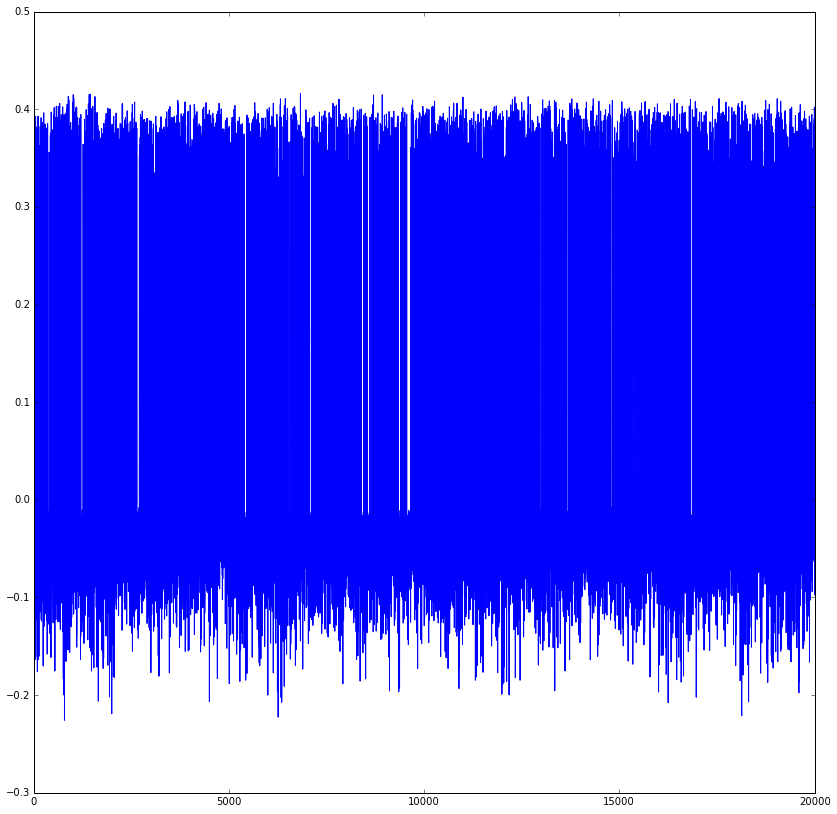

In [96]:
plt.plot(aa[:,0])

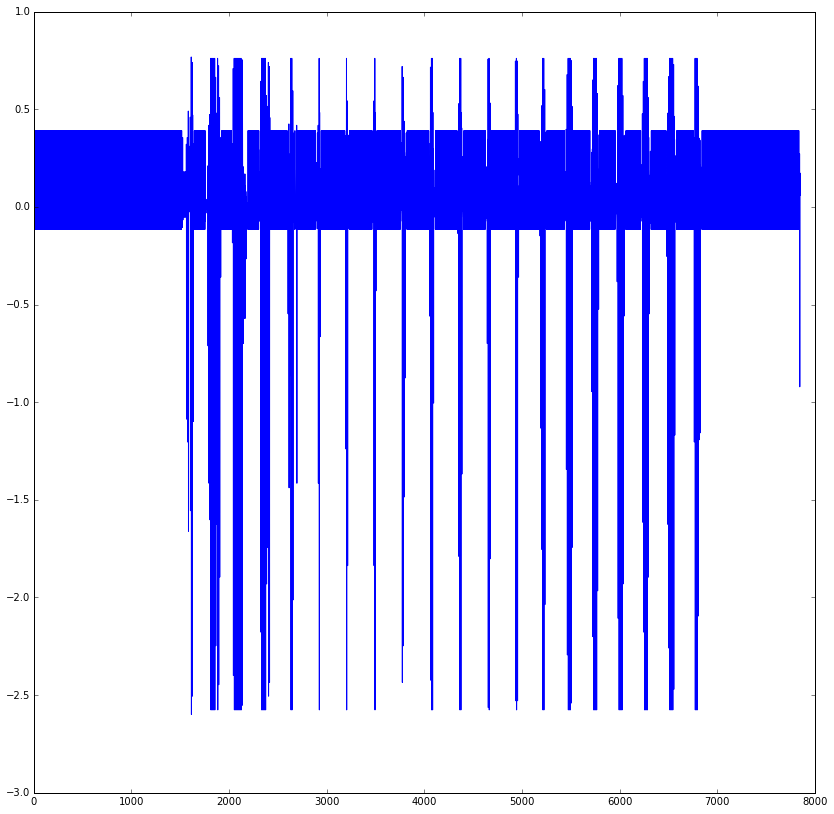

In [71]:
plt.plot(aa[0,:])